In [2]:
%load_ext jupyternotify

# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import timeit
import joblib

import main

from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
# from scipy.stats import *

pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [2]:
# pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
data_df_1522 = pd.read_csv('data/PitchDataCleanedLean_15-22.csv', index_col=[0])

In [5]:
data_test_df = data_df_1522[data_df_1522['game_year']==2019].copy()

In [6]:
data_train_df = data_df_1522[data_df_1522['game_year'].isin([2015, 2016, 2017, 2018])].copy()

In [7]:
T_batters_dict_1518_new = joblib.load('data/T/T_batters_dict_1518_new')
T_pitchers_dict_1518_new = joblib.load('data/T/T_pitchers_dict_1518_new')

In [8]:
batter_quali_list = list(T_batters_dict_1518_new.keys())
pitcher_quali_list = list(T_pitchers_dict_1518_new.keys())

## batter per year pa limit: 70
## pitcher per year pa limit: 150

In [ ]:
# player_type = 'batter'
# pa_count_df = data_df_1519.groupby(['game_year', player_type, 'game_pk', 'at_bat_number']).agg({'n_count':'first'}).reset_index()
# pa_count_by_year = pa_count_df.groupby([player_type, 'game_year']).agg({'n_count':sum}).reset_index()
# # pa_count_by_year[pa_count_by_year['game_year']==2015]['n_count'].describe()
# # pa_count_by_year[pa_count_by_year['game_year']==2016]['n_count'].describe()
# # pa_count_by_year[pa_count_by_year['game_year']==2017]['n_count'].describe()
# # pa_count_by_year[pa_count_by_year['game_year']==2018]['n_count'].describe()
# # pa_count_by_year[pa_count_by_year['game_year']==2019]['n_count'].describe()

# threshold = 30
# pa_count_by_year['annual_thresh'] = 0
# pa_count_by_year.loc[pa_count_by_year['n_count']>=threshold, 'annual_thresh'] = 1
# threshold_df = pa_count_by_year.groupby(player_type).agg({'annual_thresh':sum}).reset_index()

# threshold_df[threshold_df['annual_thresh']==5]

# data_df = data_df_1518.copy()

# overall_treshold = 400
# annual_threshold = 70
# player_id = 545361
# player_df = data_df[data_df['batter']==player_id].copy()

In [9]:
T_batters_weighted_dict = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=lambda x:np.log(np.exp(1/(599+x)/np.log(np.exp(1/600)))), cur_year=2018, annual_pa_threshold=70)

  0%|          | 0/491 [00:00<?, ?it/s]

In [10]:
T_pitchers_weighted_dict = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=lambda x:np.log(np.exp(1/(599+x)/np.log(np.exp(1/600)))), cur_year=2018, annual_pa_threshold=150)

  0%|          | 0/487 [00:00<?, ?it/s]

In [125]:
# without year weight

pa_df = main.test_T_dict(data_test_df, T_batters_dict_1518_new, T_pitchers_dict_1518_new, batter_quali_list, pitcher_quali_list, p_weight=0.34)

main.get_brier_score(pa_df[main.EVENT_LIST].values, pa_df[main.PROBA_LIST].values)

  0%|          | 0/31448 [00:00<?, ?it/s]

0.703643104558753

In [21]:
# with year weight

pa_df_weighted = main.test_T_dict(data_test_df, T_batters_weighted_dict, T_pitchers_weighted_dict, batter_quali_list, pitcher_quali_list, p_weight=0.34)

main.get_brier_score(pa_df_weighted[main.EVENT_LIST].values, pa_df_weighted[main.PROBA_LIST].values)

  0%|          | 0/31448 [00:00<?, ?it/s]

0.7034832949737069

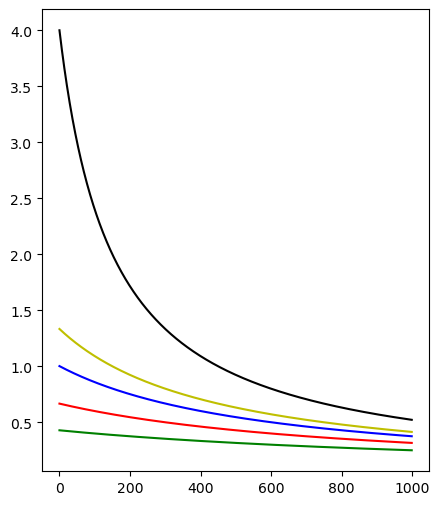

In [3]:
x_list = [x for x in range(1000)]
y_list = [np.log(np.exp(1/(599+y)/np.log(np.exp(1/600)))) for y in x_list]
y_list_2 = [np.log(np.exp(1/(900+y)/np.log(np.exp(1/600)))) for y in x_list]
y_list_3 = [np.log(np.exp(1/(1400+y)/np.log(np.exp(1/600)))) for y in x_list]
y_list_4 = [np.log(np.exp(1/(450+y)/np.log(np.exp(1/600)))) for y in x_list]
y_list_5 = [np.log(np.exp(1/(150+y)/np.log(np.exp(1/600)))) for y in x_list]


# sns.lineplot(x=x_list, y=y_list)
fig, ax = plt.subplots(figsize=[5, 6])
plt.plot(x_list, y_list, c='b')
plt.plot(x_list, y_list_2, c='r')
plt.plot(x_list, y_list_3, c='g')
plt.plot(x_list, y_list_4, c='y')
plt.plot(x_list, y_list_5, c='black')
plt.show()

In [90]:
weight_func = lambda x:np.log(np.exp(1/(300+x)/np.log(np.exp(1/600))))
T_batters_weighted_300 = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=weight_func, cur_year=2018, annual_pa_threshold=70)
T_pitchers_weighted_300 = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=weight_func, cur_year=2018, annual_pa_threshold=150)

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

In [93]:
# with year weight

pa_df_weighted = main.test_T_dict(data_test_df, T_batters_weighted_300, T_pitchers_weighted_300, batter_quali_list, pitcher_quali_list, p_weight=0.34)

main.get_brier_score(pa_df_weighted[main.EVENT_LIST].values, pa_df_weighted[main.PROBA_LIST].values)

  0%|          | 0/31448 [00:00<?, ?it/s]

0.7034121393235062

In [97]:
weight_func = lambda x:np.log(np.exp(1/(200+x)/np.log(np.exp(1/600))))
T_batters_weighted_200 = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=weight_func, cur_year=2018, annual_pa_threshold=70)
T_pitchers_weighted_200 = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=weight_func, cur_year=2018, annual_pa_threshold=150)

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

In [98]:
# with year weight

pa_df_weighted = main.test_T_dict(data_test_df, T_batters_weighted_200, T_pitchers_weighted_200, batter_quali_list, pitcher_quali_list, p_weight=0.34)

main.get_brier_score(pa_df_weighted[main.EVENT_LIST].values, pa_df_weighted[main.PROBA_LIST].values)

  0%|          | 0/31448 [00:00<?, ?it/s]

0.7033899833757505

In [99]:
weight_func = lambda x:np.log(np.exp(1/(100+x)/np.log(np.exp(1/600))))
T_batters_weighted_100 = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=weight_func, cur_year=2018, annual_pa_threshold=70)
T_pitchers_weighted_100 = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=weight_func, cur_year=2018, annual_pa_threshold=150)

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

In [122]:
weight_func = lambda x:np.log(np.exp(1/(150+x)/np.log(np.exp(1/600))))
T_batters_weighted_150 = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=weight_func, cur_year=2018, annual_pa_threshold=70)
T_pitchers_weighted_150 = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=weight_func, cur_year=2018, annual_pa_threshold=150)

# with year weight

pa_df_weighted = main.test_T_dict(data_test_df, T_batters_weighted_150, T_pitchers_weighted_150, batter_quali_list, pitcher_quali_list, p_weight=0.4)

main.get_brier_score(pa_df_weighted[main.EVENT_LIST].values, pa_df_weighted[main.PROBA_LIST].values)

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

  0%|          | 0/31448 [00:00<?, ?it/s]

0.7033923649037042

In [118]:
weight_func = lambda x:np.log(np.exp(1/(100+x)/np.log(np.exp(1/600))))
T_batters_weighted_100 = main.get_allplayers_T_weighted(batter_quali_list, data_train_df, is_pitcher=False, weight_func=weight_func, cur_year=2018, annual_pa_threshold=70)
T_pitchers_weighted_100 = main.get_allplayers_T_weighted(pitcher_quali_list, data_train_df, is_pitcher=True, weight_func=weight_func, cur_year=2018, annual_pa_threshold=150)

# with year weight

pa_df_weighted = main.test_T_dict(data_test_df, T_batters_weighted_100, T_pitchers_weighted_100, batter_quali_list, pitcher_quali_list, p_weight=0.34)

main.get_brier_score(pa_df_weighted[main.EVENT_LIST].values, pa_df_weighted[main.PROBA_LIST].values)

  0%|          | 0/491 [00:00<?, ?it/s]

  0%|          | 0/487 [00:00<?, ?it/s]

  0%|          | 0/31448 [00:00<?, ?it/s]

0.7033997950914194

# Best: 150 B Score: 0.7033867122887294

In [127]:
pa_df_weighted

,game_year,game_pk,at_bat_number,pitcher,batter,home_team,stand,p_throws,event_type,des,1B,2B,3B,HR,FO,BB,K,other,1B_proba,2B_proba,3B_proba,HR_proba,FO_proba,BB_proba,K_proba,other_proba
0,2019,564734,1,518774,425783,LAA,L,R,BB,Shin-Soo Choo hit by pitch.,0,0,0,0,0,1,0,0,0.15241,0.04271,0.00295,0.03521,0.43834,0.11287,0.21352,0.00199
1,2019,564734,2,518774,596059,LAA,L,R,K,Rougned Odor strikes out swinging.,0,0,0,0,0,0,1,0,0.14726,0.04321,0.00526,0.03815,0.47017,0.07713,0.21678,0.00204
2,2019,564734,3,518774,462101,LAA,R,R,1B,Elvis Andrus singles on a line drive to right ...,1,0,0,0,0,0,0,0,0.16732,0.04858,0.00624,0.02493,0.51528,0.07241,0.16440,0.00085
3,2019,564734,4,518774,608336,LAA,L,R,HR,Joey Gallo homers (2) on a fly ball to center ...,0,0,0,1,0,0,0,0,0.10758,0.04125,0.00391,0.05636,0.39062,0.10553,0.29378,0.00096
4,2019,564734,5,518774,452678,LAA,L,R,BB,Asdrubal Cabrera walks.,0,0,0,0,0,1,0,0,0.15231,0.05359,0.00321,0.03668,0.48397,0.07598,0.19128,0.00298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83656,2019,567632,41,593140,519346,MIL,L,R,HR,Eric Thames homers (23) on a fly ball to cente...,0,0,0,1,0,0,0,0,0.10919,0.04513,0.00826,0.04716,0.35922,0.11215,0.31692,0.00198
83657,2019,567632,42,593140,456715,MIL,R,R,BB,Lorenzo Cain walks.,0,0,0,0,0,1,0,0,0.17797,0.04711,0.00481,0.02319,0.43110,0.11123,0.20273,0.00187
83658,2019,567632,43,593140,592325,MIL,L,R,K,Ben Gamel strikes out swinging.,0,0,0,0,0,0,1,0,0.15869,0.05096,0.00962,0.01643,0.41640,0.10721,0.23624,0.00445
83659,2019,567632,44,593140,606115,MIL,R,R,FO,"Orlando Arcia grounds out, third baseman Erik ...",0,0,0,0,1,0,0,0,0.15687,0.04716,0.00330,0.01980,0.46035,0.06848,0.24280,0.00124


In [130]:
pitcher_list = pa_df_weighted['pitcher'].to_list()
batter_list = pa_df_weighted['batter'].to_list()

In [135]:
P_predicted_pitcher = []
for p in tqdm(pitcher_list):
    P_steady = list(main.sim_steady_state(T_pitchers_weighted_150[p])[0][-8:])
    P_predicted_pitcher+=[P_steady]

  0%|          | 0/83661 [00:00<?, ?it/s]

In [163]:
P_predicted_batter = []
for p in tqdm(batter_list):
    P_steady = list(main.sim_steady_state(T_batters_weighted_150[p])[0][-8:])
    P_predicted_batter+=[P_steady]

  0%|          | 0/83661 [00:00<?, ?it/s]

In [164]:
P_predicted_pitcher_df = pd.DataFrame(P_predicted_pitcher, columns=[p + '_p' for p in main.PROBA_LIST])
P_predicted_batter_df = pd.DataFrame(P_predicted_batter, columns=[p + '_b' for p in main.PROBA_LIST])

In [165]:
pa_df = pd.concat([pa_df_weighted, P_predicted_pitcher_df, P_predicted_batter_df], axis=1)

In [168]:
pa_df.to_csv('data/PA_data_19_seperated.csv')